In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
from util import extract, plotting

%matplotlib inline

Using cache found in /home/nattkorat/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-6 Python-3.10.12 torch-2.1.0.dev20230706+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12006MiB)

Fusing layers... 
Model summary: 267 layers, 46253673 parameters, 0 gradients, 108.1 GFLOPs
Adding AutoShape... 
Using cache found in /home/nattkorat/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-6 Python-3.10.12 torch-2.1.0.dev20230706+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12006MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


In [2]:
directory = 'test_img'

list_image = os.listdir(directory)[:100]

images = [os.path.join(directory, i) for i in list_image]
images[:5]

['test_img/road_pp37.jpg',
 'test_img/2_jpg.rf.6f22c40f457eea5c6359f0f2f42d9c42.jpg',
 'test_img/20230628121.jpg',
 'test_img/siem_reap47.jpg',
 'test_img/siem_reap16.jpg']

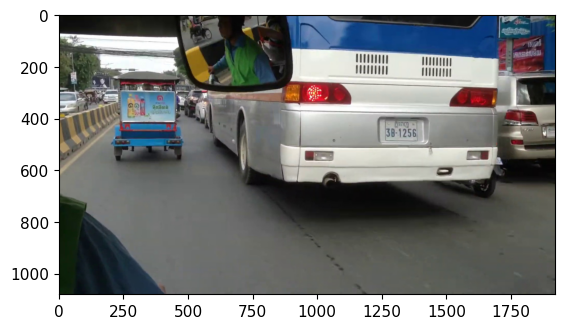

In [3]:
img = cv2.imread(images[0])
roi = extract.roi(images[0], 0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
for r in roi:
    img = plotting.plotting(img, r)



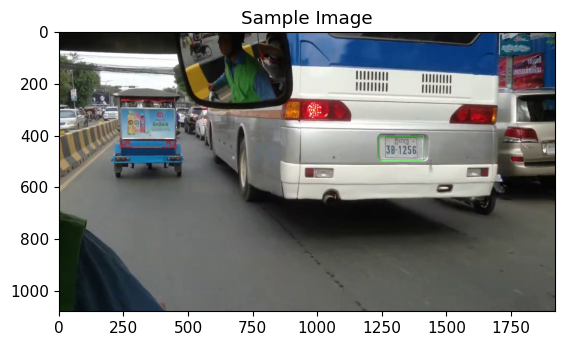

In [5]:
plt.title("Sample Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
region = []
widths = []
heights = []
for r in roi:
    x_min, y_min, x_max, y_max = r
    width, height = x_max - x_min, y_max - y_min
    area = width * height
    widths.append(width)
    heights.append(height)
    region.append(area)

print(f'area = {region}')
print(f'Width = {widths}')
print(f'height = {heights}')

area = [15996]
Width = [172]
height = [93]


In [7]:
place = []
for i in roi:
    x, y, x1, y1 = i
    place.append(extract.get_info(img[y:y1, x:x1]))

print(place)

[('Phnom Penh', [59, 8, 114, 35])]


In [8]:
df = {
    'image': [],
    'height': [],
    'width': [],
    'place': []
}

In [9]:
for image in images:
    img = cv2.imread(image)
    roi = extract.roi(img, 0)
    for r in roi:
        x, y, x1, y1 = r
        width, height = x1 - x, y1 - y
        info = extract.get_info(img[y:y1, x:x1])
        
        df['image'].append(image)
        df['width'].append(width)
        df['height'].append(height)
        df['place'].append(info[0])

df

{'image': ['test_img/road_pp37.jpg',
  'test_img/2_jpg.rf.6f22c40f457eea5c6359f0f2f42d9c42.jpg',
  'test_img/20230628121.jpg',
  'test_img/20230628121.jpg',
  'test_img/siem_reap47.jpg',
  'test_img/siem_reap16.jpg',
  'test_img/siem_reap16.jpg',
  'test_img/morning_drive_pp_23481.jpg',
  'test_img/morning_drive_pp_23481.jpg',
  'test_img/road_pp18.jpg',
  'test_img/preah_monivong_blvd79.jpg',
  'test_img/preah_monivong_blvd79.jpg',
  'test_img/siem_reap28.jpg',
  'test_img/siem_reap28.jpg',
  'test_img/siem_reap28.jpg',
  'test_img/-872300167906305244721876-e_jpg.rf.965aaf5f9848b506ea980b911e6fee48.jpg',
  'test_img/06-1-847064168541707334520417-b_jpg.rf.4908fb6eb60aa0b94f6496e7b5a01ac8.jpg',
  'test_img/road_pp1.jpg',
  'test_img/road_pp1.jpg',
  'test_img/road_pp1.jpg',
  'test_img/202306291179.jpg',
  'test_img/202306291179.jpg',
  'test_img/siem_reap32.jpg',
  'test_img/Police_pick-up_truck_in_Cambodia-1-_jpg.rf.7e1636ff742d23041dda0ca80283669f.jpg',
  'test_img/ratanakiri17.jpg',

In [10]:
import pandas as pd

dataframe = pd.DataFrame(df)
dataframe

,image,height,width,place
0,test_img/road_pp37.jpg,94,169,Phnom Penh
1,test_img/2_jpg.rf.6f22c40f457eea5c6359f0f2f42d...,75,122,Police
2,test_img/20230628121.jpg,75,126,Kandal
3,test_img/20230628121.jpg,38,135,Phnom Penh
4,test_img/siem_reap47.jpg,103,164,Siem Reap
...,...,...,...,...
129,test_img/preah_monivong_blvd25.jpg,58,74,Koh Kong
130,test_img/preah_monivong_blvd25.jpg,41,71,Phnom Penh
131,test_img/siem_reap50.jpg,96,156,Siem Reap
132,test_img/fn-2019-01-24-10-37-19-16_jpg.rf.ee1c...,49,91,


In [11]:
dataframe.describe()

,height,width
count,134.000000,134.000000
mean,78.552239,136.746269
std,38.031362,62.595694
min,23.000000,41.000000
25%,51.000000,92.500000
50%,68.000000,118.000000
75%,99.750000,168.750000
max,263.000000,382.000000


In [12]:
dataframe.isna().sum()

image     0
height    0
width     0
place     0
dtype: int64

In [13]:
dataframe['size'] = dataframe['width'] * dataframe['height']
dataframe['predicted'] = dataframe['place'].apply(lambda x: True if x else False)

dataframe

,image,height,width,place,size,predicted
0,test_img/road_pp37.jpg,94,169,Phnom Penh,15886,True
1,test_img/2_jpg.rf.6f22c40f457eea5c6359f0f2f42d...,75,122,Police,9150,True
2,test_img/20230628121.jpg,75,126,Kandal,9450,True
3,test_img/20230628121.jpg,38,135,Phnom Penh,5130,True
4,test_img/siem_reap47.jpg,103,164,Siem Reap,16892,True
...,...,...,...,...,...,...
129,test_img/preah_monivong_blvd25.jpg,58,74,Koh Kong,4292,True
130,test_img/preah_monivong_blvd25.jpg,41,71,Phnom Penh,2911,True
131,test_img/siem_reap50.jpg,96,156,Siem Reap,14976,True
132,test_img/fn-2019-01-24-10-37-19-16_jpg.rf.ee1c...,49,91,,4459,False


In [ ]:
dataframe.to_csv("size_testing_data.csv", index=False)